# <center> Titanic Survival Predictions
   

## Data:-
>* The data has been split into two groups:
training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.
>*The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

>* Feature information
>>* pclass: A proxy for socio-economic status (SES)
>>>* 1st = Upper
>>>* 2nd = Middle
>>>* 3rd = Lower
>>* age: Age in Years.
>>* sibsp: Number of siblings / spouses.
>>>* Sibling = brother, sister, stepbrother, stepsister
>>>* Spouse = husband, wife (mistresses and fiancés were ignored)
>>* parch: Number of people having parent- child realtion.
>>>* Parent = mother, father
>>>* Child = daughter, son, stepdaughter, stepson
>>>* Some children travelled only with a nanny, therefore parch=0 for them.
>>* ticket : Ticket Number
>>* fare : Passenger Fare
>>* cabin : Cabin Number
>>* embarked : Port of Embarkation
>>>* C = Cherbourg
>>>* Q = Queenstown
>>>* S = Southampton

In [3]:
# import required tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [75]:
dataset = pd.read_excel('titanic3.xls')
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [77]:
dataset.shape

(1309, 11)

In [78]:
dataset.isna().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

**We will create different csv files for training set and testing set.**

In [79]:
training_data = dataset.sample(frac=0.8, random_state=25)
testing_data = dataset.drop(training_data.index)

In [80]:
training_data.to_csv('train_set.csv', index=False)
testing_data.to_csv('test_set.csv', index=False)

In [81]:
train_df = pd.read_csv("train_df.csv")

## EDA ( Exploratory Data Analysis )

In [95]:
train_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,0,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q
1,2,0,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.0000,NaN,S
2,3,0,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
3,3,0,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
4,3,0,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q


In [93]:
train_df.shape

(1047, 11)

In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1047 non-null   int64  
 1   survived  1047 non-null   int64  
 2   name      1047 non-null   object 
 3   sex       1047 non-null   object 
 4   age       832 non-null    float64
 5   sibsp     1047 non-null   int64  
 6   parch     1047 non-null   int64  
 7   ticket    1047 non-null   object 
 8   fare      1047 non-null   float64
 9   cabin     222 non-null    object 
 10  embarked  1045 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 90.1+ KB


**Note :** 5 columns have object datatype

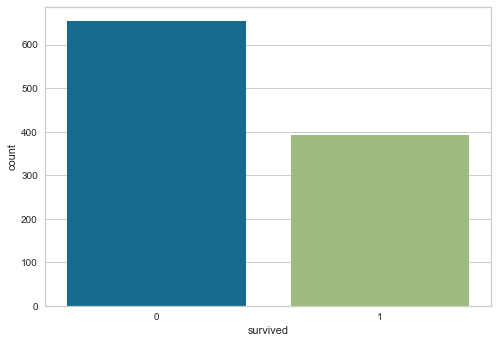

In [104]:
# plot target column visusally
sns.countplot(x= train_df.survived);

In [90]:
train_df.isna().sum()

pclass        0
survived      0
name          0
sex           0
age         215
sibsp         0
parch         0
ticket        0
fare          0
cabin       825
embarked      2
dtype: int64

**Note:** As we can see age, cabin and embarked column has null values.

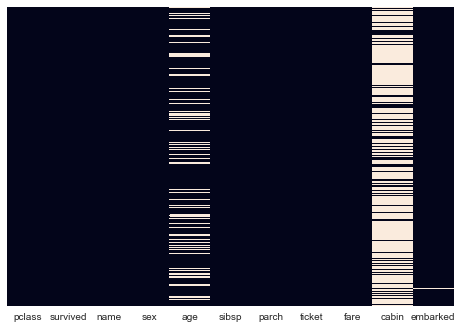

In [88]:
# visualize null values.
sns.heatmap(train_df.isnull(), yticklabels=False, cbar= False);

In [126]:
# check number of unique values in particular columns

len(train_df.name.unique())

1046

In [127]:
len(train_df.ticket), len(train_df.ticket.unique())

(1047, 785)

**Note :** From the above analysis, we got to know that name and ticket column have multiple unique values. so it should not be that important in predictions.

### Numeric Features

In [135]:
numeric_features = []
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric_features.append(label)
    
numeric_features

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']

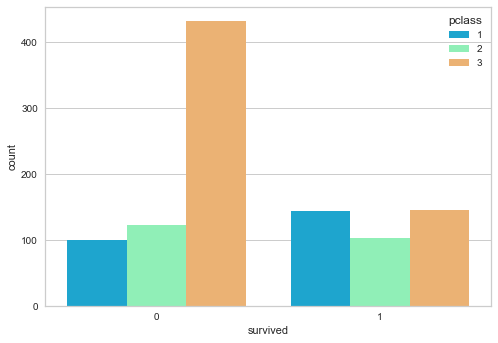

In [141]:
# plot survived column with respect to pclass column

sns.countplot(x='survived', hue='pclass', data=train_df, palette="rainbow");

**Note:** Passengers from pclass-3 less likely to survive.

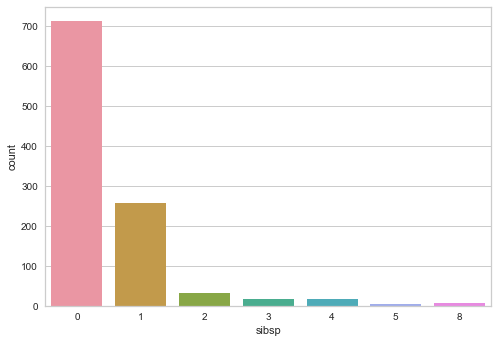

In [152]:
# plot sibsp column to visualize
sns.countplot(x= train_df.sibsp);

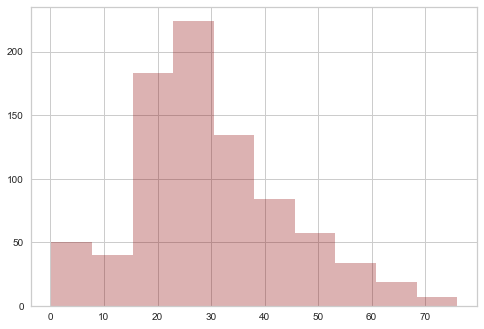

In [147]:
# plot age column values on histogram

train_df.age.hist(alpha=0.3, color='darkred');

**Note:** From above histogram, we can see average age of people is around 30.

### Categorical Features

In [150]:
categorical_features = []
for label, content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        categorical_features.append(label)
        
categorical_features

['name', 'sex', 'ticket', 'cabin', 'embarked']

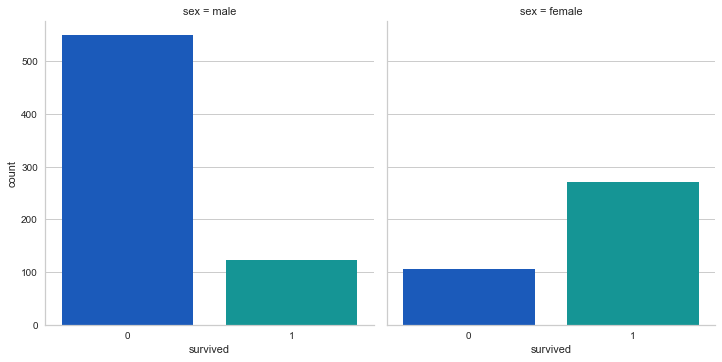

In [158]:
# plot survived column with respect to sex column

sns.catplot(x='survived', col='sex', data=train_df, kind= 'count', palette="winter");

**Note:** Looks like women are more likely to survive.

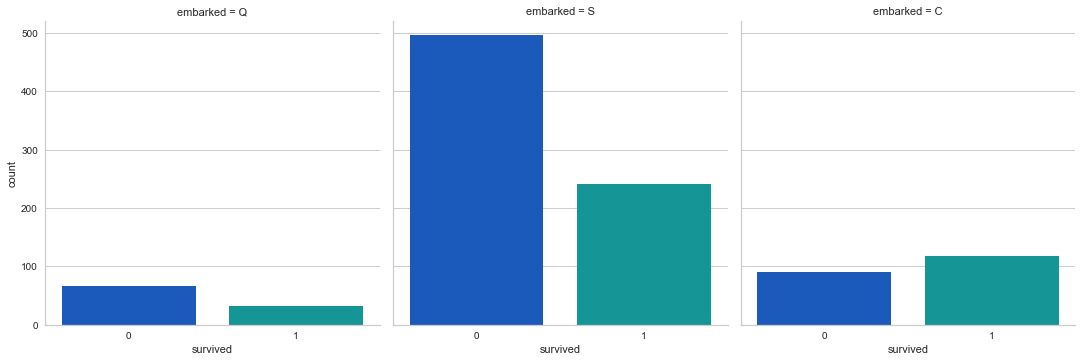

In [156]:
# plot survived column with respect to embarked column

sns.catplot(x='survived', col='embarked', data= train_df, kind='count', palette='winter');

**Note:** Passengers who embarked in Southampton were less likely to survive.

* ### From EDA we see that some columns like name, ticket will not be that useful in predictions. 
* ### Age column has some missing values which we can fill with some imputation.
* ### Cabin column has 80% of it's values missing.

In [230]:
# Make a copy of train_df to do processing.

train_df_temp = train_df.copy()

In [231]:
# Drop columns like name, ticket, cabin

train_df_temp.drop(['name', 'ticket', 'cabin'], axis=1, inplace= True)
train_df_temp.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,male,NaN,0,0,7.7500,Q
1,2,0,male,41.0,0,0,13.0000,S
2,3,0,male,14.0,4,1,39.6875,S
3,3,0,male,18.0,0,0,8.3000,S
4,3,0,female,NaN,0,0,7.7500,Q


In [232]:
train_df_temp.isna().sum()

pclass        0
survived      0
sex           0
age         215
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

* embarked column has only two null values. so we will drop those rows.
* we will fill null values in age column with median of that column.

In [236]:
# fill missing values in age column with median of that column.
train_df_temp['age'] = train_df_temp['age'].fillna(train_df_temp.age.median())

In [240]:
train_df_temp.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [239]:
train_df_temp.dropna(how='any', inplace=True)

In [243]:
train_df_temp.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,male,28.0,0,0,7.7500,Q
1,2,0,male,41.0,0,0,13.0000,S
2,3,0,male,14.0,4,1,39.6875,S
3,3,0,male,18.0,0,0,8.3000,S
4,3,0,female,28.0,0,0,7.7500,Q


In [242]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1045 non-null   int64  
 1   survived  1045 non-null   int64  
 2   sex       1045 non-null   object 
 3   age       1045 non-null   float64
 4   sibsp     1045 non-null   int64  
 5   parch     1045 non-null   int64  
 6   fare      1045 non-null   float64
 7   embarked  1045 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 73.5+ KB


### We have two columns of object type, so we have to convert them into numeric values.


**One Hot Encoding**

In [244]:
dummies = pd.get_dummies(train_df_temp.embarked, drop_first=True)
train_df_encoded = pd.concat([train_df_temp, dummies], axis='columns')

In [245]:
train_df_encoded.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Q,S
0,3,0,male,28.0,0,0,7.7500,Q,1,0
1,2,0,male,41.0,0,0,13.0000,S,0,1
2,3,0,male,14.0,4,1,39.6875,S,0,1
3,3,0,male,18.0,0,0,8.3000,S,0,1
4,3,0,female,28.0,0,0,7.7500,Q,1,0


**Label Encoding**

In [246]:
lbe = LabelEncoder()
train_df_encoded.sex = lbe.fit_transform(train_df_encoded.sex)

In [247]:
train_df_encoded.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Q,S
0,3,0,1,28.0,0,0,7.7500,Q,1,0
1,2,0,1,41.0,0,0,13.0000,S,0,1
2,3,0,1,14.0,4,1,39.6875,S,0,1
3,3,0,1,18.0,0,0,8.3000,S,0,1
4,3,0,0,28.0,0,0,7.7500,Q,1,0


In [248]:
# we will drop original columns which we have encoded

train_df_encoded.drop(['embarked'], axis=1, inplace=True)

In [252]:
train_df_encoded.head()

,pclass,survived,sex,age,sibsp,parch,fare,Q,S
0,3,0,1,28.0,0,0,7.7500,1,0
1,2,0,1,41.0,0,0,13.0000,0,1
2,3,0,1,14.0,4,1,39.6875,0,1
3,3,0,1,18.0,0,0,8.3000,0,1
4,3,0,0,28.0,0,0,7.7500,1,0


In [253]:
# saving processed data into different csv file

train_df_encoded.to_csv('processed_train.csv', index=False)

## Split the data into train and validation set

In [265]:
# import processed train csv file

processed_train_df = pd.read_csv('processed_train.csv')

In [272]:
processed_train_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,Q,S
0,3,0,1,28.0,0,0,7.7500,1,0
1,2,0,1,41.0,0,0,13.0000,0,1
2,3,0,1,14.0,4,1,39.6875,0,1
3,3,0,1,18.0,0,0,8.3000,0,1
4,3,0,0,28.0,0,0,7.7500,1,0


In [266]:
X = processed_train_df.drop('survived', axis=1)
y = processed_train_df.survived

In [267]:
X.shape, y.shape

((1045, 8), (1045,))

In [268]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [269]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((836, 8), (209, 8), (836,), (209,))

In [270]:
X_train

,pclass,sex,age,sibsp,parch,fare,Q,S
388,1,1,50.0,1,0,55.9000,0,1
256,3,1,36.0,0,0,9.5000,0,1
351,1,0,76.0,1,0,78.8500,0,1
60,3,1,17.0,1,0,7.0542,0,1
344,1,1,28.0,0,0,26.5500,0,1
...,...,...,...,...,...,...,...,...
87,1,1,28.0,0,0,25.7417,0,0
330,3,0,28.0,0,0,7.7500,1,0
466,3,1,20.0,0,0,9.8458,0,1
121,3,1,2.0,4,1,29.1250,1,0


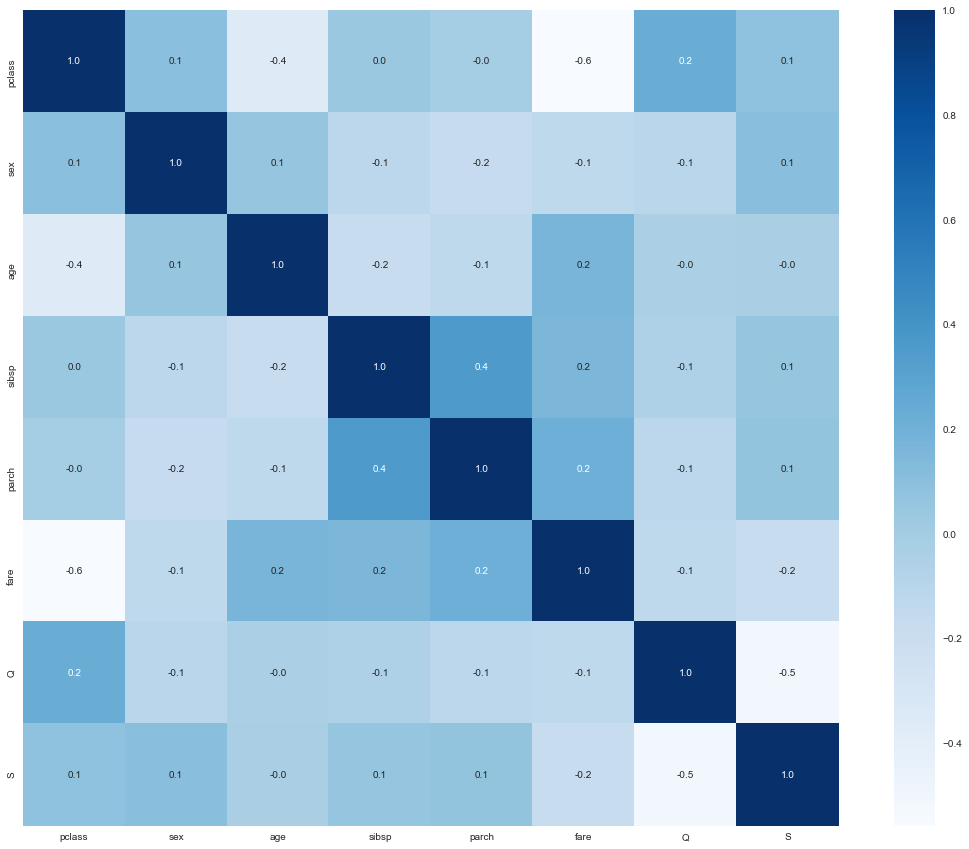

In [277]:
plt.figure(figsize=(20,15))
corr = X_train.corr()
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap= 'Blues');

As we can see from above map, No features are highly correlated

## Build a model

In [282]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [284]:
models_dict = {"random forest": RandomForestClassifier(random_state=42),
               "KNN": KNeighborsClassifier(),
               "GBC": GradientBoostingClassifier(random_state=42),
               "LG": LogisticRegression(random_state=42)
              }

In [285]:
def get_scores(model, X_train, x_test, y_train, y_test):
    np.random.seed(0)
    
    # make dictionary to collect model scores
    model_score  = {}
    for name, model in model.items():
        model.fit(X_train, y_train)
        
        model_score[name] = model.score(x_test, y_test)
        
    return model_score

In [286]:
model_scores = get_scores(models_dict, X_train, X_val, y_train, y_val)
model_scores

C:\Users\Shreyas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'random forest': 0.8086124401913876,
 'KNN': 0.7033492822966507,
 'GBC': 0.8181818181818182,
 'LG': 0.8421052631578947}

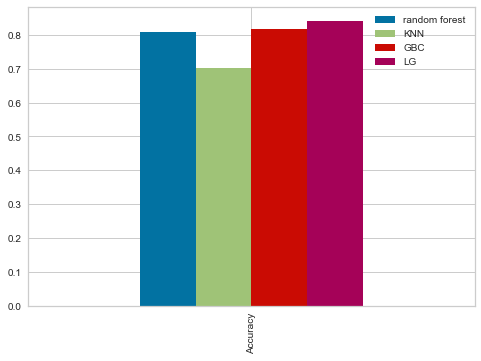

In [289]:
model_scores = pd.DataFrame(model_scores, index=['Accuracy'])
model_scores.plot.bar();

## Hyperparameter Tuning

**First we will hypertune Logistic Regression and see results.**

**1. RandomizedSearchCV**

In [301]:
lg_grid = {
           "solver":[ 'newton-cg', 'lbfgs', 'liblinear'],
           "penalty": ['l2'],
           "C": [100, 10, 1.0, 0.1, 0.01]
           }

In [306]:
lg_model1 = RandomizedSearchCV(LogisticRegression(random_state=42),
                             param_distributions= lg_grid,
                             cv = 5,
                             n_iter= 100)

In [307]:
%%time
lg_model1.fit(X_train, y_train)

C:\Users\Shreyas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Shreyas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shreyas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale t

Wall time: 1.6 s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=100,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']})

In [308]:
lg_model1.best_score_, lg_model.best_params_

(0.7823282007413743, {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1})

**Now we will hypertune Gradient Boosting Classifier and see results**

**RandomizedSearchCV**

In [311]:
gbc_grid = {'min_samples_split':[2,10,30,60],
            'min_samples_leaf':[1,3,5,7],
            'max_features':range(7,20,2),
           'max_depth':[3,4,5],
           'learning_rate':[0.15,0.1,0.05,0.01],
            'n_estimators':[100,500,750,1000]}

In [312]:
gbc1_model= RandomizedSearchCV(GradientBoostingClassifier(random_state=0,subsample=0.9),
                        param_distributions=gbc_grid,
                        cv=5,
                        n_iter=100)

In [313]:
%%time
gbc1_model.fit(X_train,y_train)

Wall time: 5min 28s


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(random_state=0,
                                                        subsample=0.9),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.15, 0.1, 0.05,
                                                          0.01],
                                        'max_depth': [3, 4, 5],
                                        'max_features': range(7, 20, 2),
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [2, 10, 30, 60],
                                        'n_estimators': [100, 500, 750, 1000]})

In [314]:
gbc1_model.best_score_, gbc1_model.best_params_

(0.8038494439692044,
 {'n_estimators': 100,
  'min_samples_split': 60,
  'min_samples_leaf': 3,
  'max_features': 13,
  'max_depth': 5,
  'learning_rate': 0.01})

**GridSearchCV**

In [315]:
gbc_gridcv = {'min_samples_split':[10,15,20],
            'min_samples_leaf':[1,2],
            'max_features':range(16,24),
           'max_depth':[4,5,6],
           'learning_rate':[0.1,0.05,0.01],
            'n_estimators':[450,500,550]}

In [316]:
%%time
gbc2_model= GridSearchCV(GradientBoostingClassifier(random_state=0,subsample=0.9),
                        param_grid=gbc_gridcv,
                        cv=5)

gbc2_model.fit(X_train,y_train)

Wall time: 1h 7min 44s


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(random_state=0,
                                                  subsample=0.9),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [4, 5, 6], 'max_features': range(16, 24),
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [450, 500, 550]})

In [317]:
gbc2_model.best_score_, gbc2_model.best_params_

(0.8038280581693755,
 {'learning_rate': 0.01,
  'max_depth': 4,
  'max_features': 16,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 450})

In [318]:
best_model = LogisticRegression()
best_model.fit(X_train, y_train)
best_model.score(X_val, y_val)

C:\Users\Shreyas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8421052631578947

C:\Users\Shreyas\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


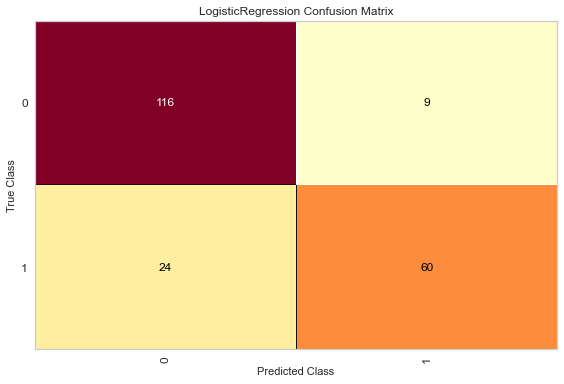

ConfusionMatrix(ax=<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x0000016E940BA6D0>,
                estimator=LogisticRegression())

In [320]:
confusion_matrix(best_model, X_train, y_train, X_val, y_val)

C:\Users\Shreyas\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


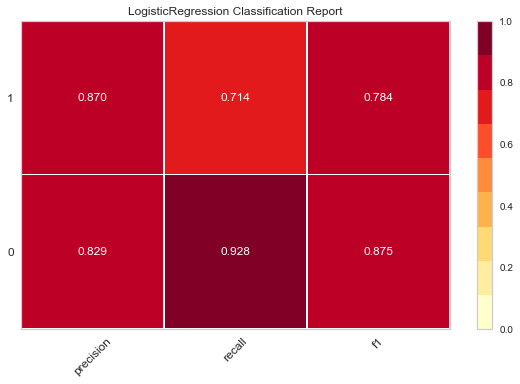

In [321]:
classification_report(best_model ,X_train, y_train, X_val, y_val );